*This recap of Deep Learning Chapter 6.1 shows how ReLU activations let neural networks solve the XOR problem that defeats any linear model.*

📓 **For a deeper dive with additional exercises and analysis**, see the [complete notebook on GitHub](https://github.com/ickma2311/foundations/blob/main/deep_learning/chapter6/6.1/xor_exercises.ipynb).

## The XOR Problem: A Challenge for Linear Models

XOR (Exclusive OR) returns 1 precisely when the two binary inputs differ:

$$\text{XOR}(x_1, x_2) = \begin{pmatrix}0 & 1\\1 & 0\end{pmatrix}$$

The XOR truth table shows why this is challenging for linear models - the positive class (1) appears at diagonally opposite corners, making it impossible to separate with any single straight line.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

# Define XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

print("XOR Truth Table:")
print("================")
print()
print("┌─────────┬────────┐")
print("│ Input   │ Output │")
print("│ (x₁,x₂) │  XOR   │")
print("├─────────┼────────┤")
for i in range(4):
    input_str = f"({X[i,0]}, {X[i,1]})"
    output_str = f"{y[i]}"
    print(f"│ {input_str:7} │   {output_str:2}   │")
print("└─────────┴────────┘")
print()
print("Notice: XOR = 1 when inputs differ, XOR = 0 when inputs match")

XOR Truth Table:

┌─────────┬────────┐
│ Input   │ Output │
│ (x₁,x₂) │  XOR   │
├─────────┼────────┤
│ (0, 0)  │   0    │
│ (0, 1)  │   1    │
│ (1, 0)  │   1    │
│ (1, 1)  │   0    │
└─────────┴────────┘

Notice: XOR = 1 when inputs differ, XOR = 0 when inputs match


## Limitation 1: Single Layer Linear Model

A single layer perceptron can only create linear decision boundaries. Let's see what happens when we try to solve XOR with logistic regression:

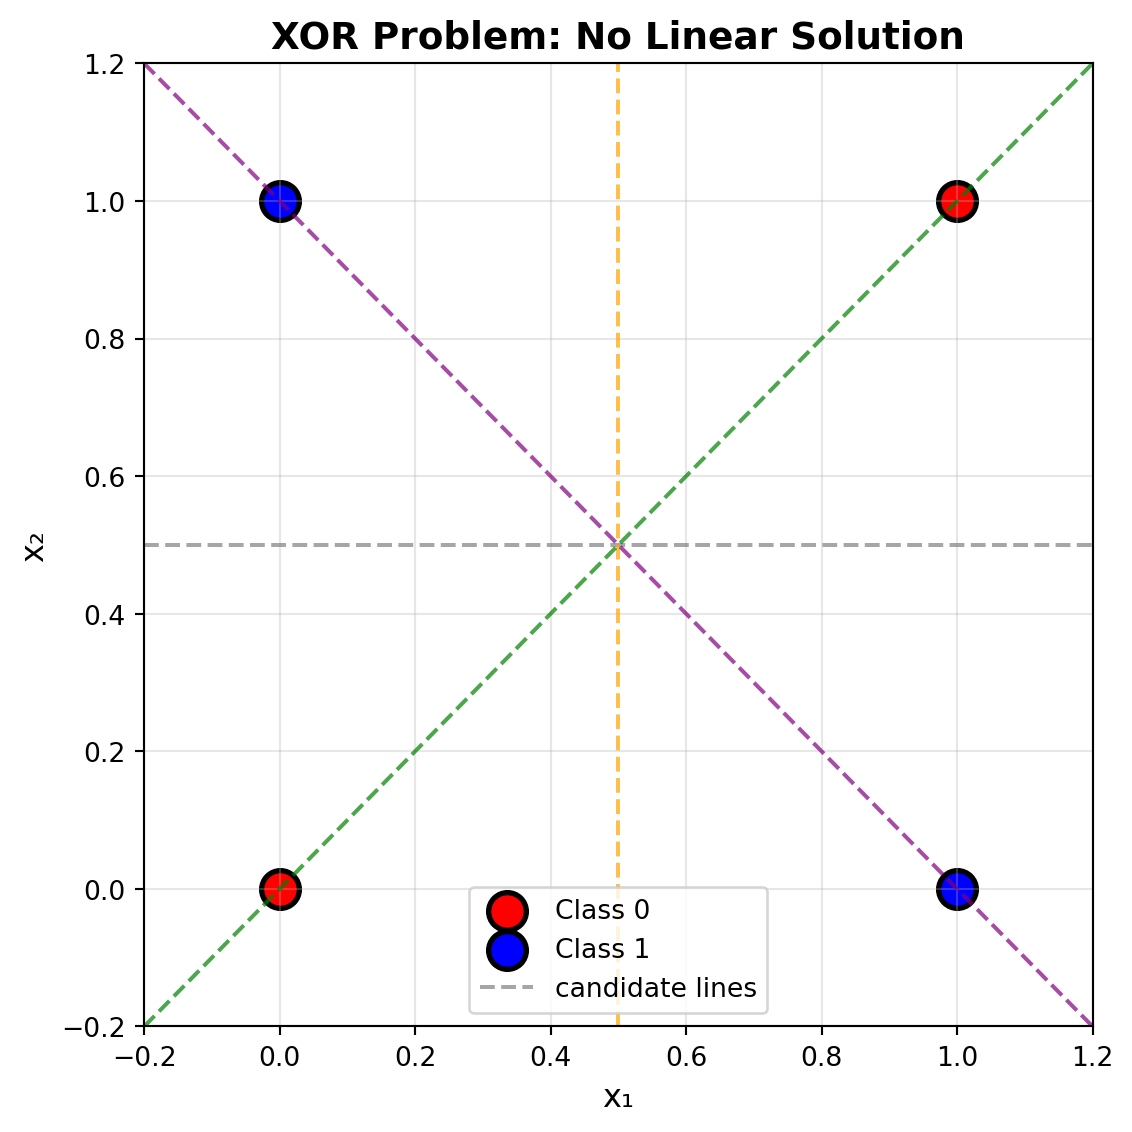

Single layer model accuracy: 50.0% - still misclassifies XOR.


In [2]:
# Demonstrate single layer linear model failure
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

colors = ['red', 'blue']

# Plot XOR data
for i in range(2):
    mask = y == i
    ax.scatter(X[mask, 0], X[mask, 1], c=colors[i], s=200, 
               label=f'Class {i}', edgecolors='black', linewidth=2)

# Overlay representative linear separators to illustrate the impossibility
x_line = np.linspace(-0.2, 1.2, 100)
ax.plot(x_line, 0.5 * np.ones_like(x_line), '--', color='gray', alpha=0.7, label='candidate lines')
ax.plot(0.5 * np.ones_like(x_line), x_line, '--', color='orange', alpha=0.7)
ax.plot(x_line, x_line, '--', color='green', alpha=0.7)
ax.plot(x_line, 1 - x_line, '--', color='purple', alpha=0.7)

ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.set_xlabel('x₁', fontsize=12)
ax.set_ylabel('x₂', fontsize=12)
ax.set_title('XOR Problem: No Linear Solution', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Fit logistic regression just to report its performance
log_reg = LogisticRegression()
log_reg.fit(X, y)
accuracy = log_reg.score(X, y)
print(f'Single layer model accuracy: {accuracy:.1%} - still misclassifies XOR.')


## Limitation 2: Multiple Layer Linear Model (Without Activation)

Even stacking multiple linear layers doesn't help! Multiple linear transformations are mathematically equivalent to a single linear transformation.

**Mathematical proof:**

$$\text{Layer 1: } h_1 = W_1 x + b_1$$
$$\text{Layer 2: } h_2 = W_2 h_1 + b_2 = W_2(W_1 x + b_1) + b_2 = (W_2W_1)x + (W_2b_1 + b_2)$$

**Result:** Still just $Wx + b$ (a single linear transformation)

**Conclusion:** Stacking linear layers without activation functions doesn't increase the model's expressive power!

## The Solution: ReLU Activation Function
ReLU (Rectified Linear Unit) provides the nonlinearity needed to solve XOR:
- **ReLU(z) = max(0, z)**
- Clips negative values to zero, keeping positive values unchanged

Using the hand-crafted network from the next code cell, the forward pass can be written compactly in matrix form:

$$
X = \begin{bmatrix} 0 & 0 \\ 0 & 1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix},
\quad
W_1 = \begin{bmatrix} 1 & -1 \\ -1 & 1 \end{bmatrix},
\quad
b_1 = \begin{bmatrix} 0 & 0 \end{bmatrix}
$$

$$
Z = X W_1^{\top} + b_1 = \begin{bmatrix} 0 & 0 \\ -1 & 1 \\ 1 & -1 \\ 0 & 0 \end{bmatrix},
\qquad
H = \text{ReLU}(Z) = \begin{bmatrix} 0 & 0 \\ 0 & 1 \\ 1 & 0 \\ 0 & 0 \end{bmatrix}
$$

With output parameters
$$
w_2 = \begin{bmatrix} 1 & 1 \end{bmatrix},
\quad
b_2 = -0.5
$$
the final linear scores are
$$
a = H w_2^{\top} + b_2 = \begin{bmatrix} -0.5 \\ 0.5 \\ 0.5 \\ -0.5 \end{bmatrix}
\Rightarrow
\text{sign}_+(a) = \begin{bmatrix} 0 \\ 1 \\ 1 \\ 0 \end{bmatrix}
$$

Here $\text{sign}_+(a)$ maps non-negative entries to 1 and negative entries to 0. Let's see how ReLU transforms the XOR problem to make it solvable.

In [3]:
# Hand-crafted network weights and biases that solve XOR
from IPython.display import display, Math

def relu(z):
    return np.maximum(0, z)

W1 = np.array([[1, -1],
               [-1, 1]])
b1 = np.array([0, 0])
w2 = np.array([1, 1])
b2 = -0.5

display(Math(r"\text{Hidden layer: } W_1 = \begin{bmatrix} 1 & -1 \\ -1 & 1 \end{bmatrix}"))
display(Math(r"b_1 = \begin{bmatrix} 0 \\ 0 \end{bmatrix}"))
display(Math(r"\text{Output layer: } w_2 = \begin{bmatrix} 1 & 1 \end{bmatrix}"))
display(Math(r"b_2 = -0.5"))

def forward_pass(X, W1, b1, w2, b2):
    z1 = X @ W1.T + b1
    h1 = relu(z1)
    logits = h1 @ w2 + b2
    return logits, h1, z1

logits, hidden_activations, pre_activations = forward_pass(X, W1, b1, w2, b2)
predictions = (logits >= 0).astype(int)

print("Step-by-step Forward Pass Results:")
print("=" * 80)
print()
print("┌─────────┬──────────────────┬──────────────────┬─────────┬──────────┐")
print("│ Input   │  Before ReLU     │  After ReLU      │  Logit  │   Pred   │")
print("│ (x₁,x₂) │    (z₁, z₂)      │    (h₁, h₂)      │  score  │  class   │")
print("├─────────┼──────────────────┼──────────────────┼─────────┼──────────┤")
for i in range(len(X)):
    x1, x2 = X[i]
    z1_vals = pre_activations[i]
    h1_vals = hidden_activations[i]
    logit = logits[i]
    pred = predictions[i]
    
    input_str = f"({x1:.0f}, {x2:.0f})"
    pre_relu_str = f"({z1_vals[0]:4.1f}, {z1_vals[1]:4.1f})"
    post_relu_str = f"({h1_vals[0]:4.1f}, {h1_vals[1]:4.1f})"
    logit_str = f"{logit:6.2f}"
    pred_str = f"{pred:4d}"
    
    print(f"│ {input_str:7} │ {pre_relu_str:16} │ {post_relu_str:16} │ {logit_str:7} │ {pred_str:8} │")
print("└─────────┴──────────────────┴──────────────────┴─────────┴──────────┘")

accuracy = (predictions == y).mean()
print(f"\nNetwork Accuracy: {accuracy:.0%} ✅")
print("\nKey transformations:")
print("• (-1, 1) → (0, 1) makes XOR(0,1) = 1 separable")
print("• ( 1,-1) → (1, 0) makes XOR(1,0) = 1 separable")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Step-by-step Forward Pass Results:

┌─────────┬──────────────────┬──────────────────┬─────────┬──────────┐
│ Input   │  Before ReLU     │  After ReLU      │  Logit  │   Pred   │
│ (x₁,x₂) │    (z₁, z₂)      │    (h₁, h₂)      │  score  │  class   │
├─────────┼──────────────────┼──────────────────┼─────────┼──────────┤
│ (0, 0)  │ ( 0.0,  0.0)     │ ( 0.0,  0.0)     │  -0.50  │    0     │
│ (0, 1)  │ (-1.0,  1.0)     │ ( 0.0,  1.0)     │   0.50  │    1     │
│ (1, 0)  │ ( 1.0, -1.0)     │ ( 1.0,  0.0)     │   0.50  │    1     │
│ (1, 1)  │ ( 0.0,  0.0)     │ ( 0.0,  0.0)     │  -0.50  │    0     │
└─────────┴──────────────────┴──────────────────┴─────────┴──────────┘

Network Accuracy: 100% ✅

Key transformations:
• (-1, 1) → (0, 1) makes XOR(0,1) = 1 separable
• ( 1,-1) → (1, 0) makes XOR(1,0) = 1 separable


### Transformation Table: How ReLU Solves XOR

Let's trace through exactly what happens to each input:

In [4]:

# Create detailed transformation table
print("Complete Transformation Table:")
print("=============================")
print()
print("Input   | Pre-ReLU  | Post-ReLU | Logit | Prediction | Target | Correct?")
print("(x₁,x₂) | (z₁, z₂)  | (h₁, h₂)  | score | class      | y      |")
print("--------|-----------|-----------|-------|------------|--------|----------")

for i in range(4):
    input_str = f"({X[i,0]},{X[i,1]})"
    pre_relu_str = f"({pre_activations[i,0]:2.0f},{pre_activations[i,1]:2.0f})"
    post_relu_str = f"({hidden_activations[i,0]:.0f},{hidden_activations[i,1]:.0f})"
    logit_str = f"{logits[i]:.2f}"
    pred_str = f"{predictions[i]}"
    target_str = f"{y[i]}"
    correct_str = "✓" if predictions[i] == y[i] else "✗"

    print(f"{input_str:7} | {pre_relu_str:9} | {post_relu_str:9} | {logit_str:5} | {pred_str:10} | {target_str:6} | {correct_str}")

print()
print("Key Insight: ReLU transforms (-1,1) → (0,1) and (1,-1) → (1,0)")
print("This makes the XOR classes linearly separable in the hidden space!")


Complete Transformation Table:

Input   | Pre-ReLU  | Post-ReLU | Logit | Prediction | Target | Correct?
(x₁,x₂) | (z₁, z₂)  | (h₁, h₂)  | score | class      | y      |
--------|-----------|-----------|-------|------------|--------|----------
(0,0)   | ( 0, 0)   | (0,0)     | -0.50 | 0          | 0      | ✓
(0,1)   | (-1, 1)   | (0,1)     | 0.50  | 1          | 1      | ✓
(1,0)   | ( 1,-1)   | (1,0)     | 0.50  | 1          | 1      | ✓
(1,1)   | ( 0, 0)   | (0,0)     | -0.50 | 0          | 0      | ✓

Key Insight: ReLU transforms (-1,1) → (0,1) and (1,-1) → (1,0)
This makes the XOR classes linearly separable in the hidden space!


### Step 1: Original Input Space

The XOR problem in its raw form - notice how no single line can separate the classes:

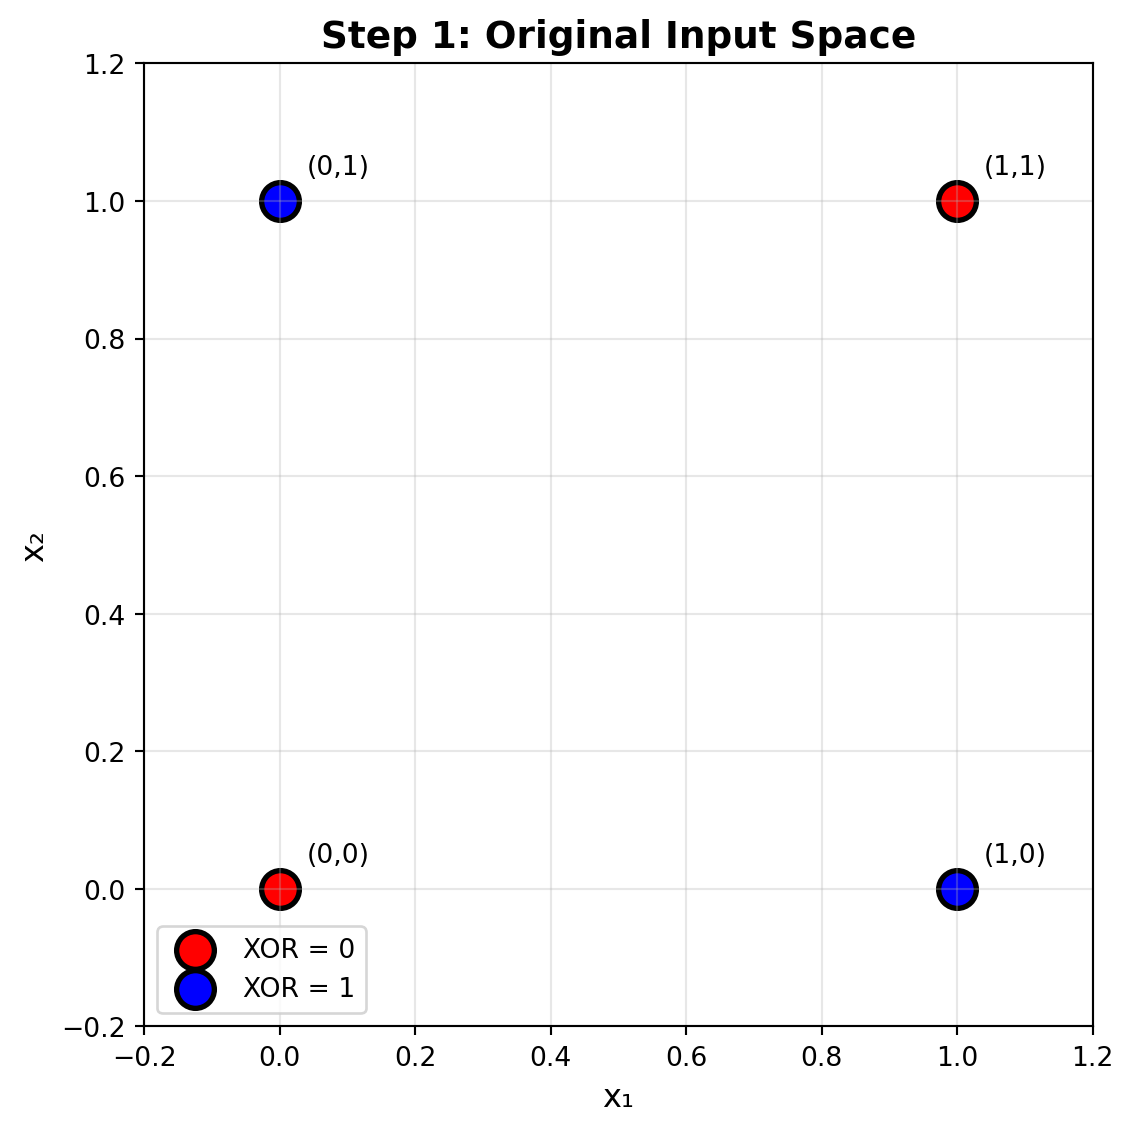

In [5]:
# Step 1 visualization: Original Input Space
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

for i in range(2):
    mask = y == i
    ax.scatter(X[mask, 0], X[mask, 1], c=colors[i], s=200, 
               label=f'XOR = {i}', edgecolors='black', linewidth=2)

# Annotate each point
for i in range(4):
    ax.annotate(f'({X[i,0]},{X[i,1]})', X[i], xytext=(10, 10), 
                textcoords='offset points', fontsize=10)

ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.set_xlabel('x₁', fontsize=12)
ax.set_ylabel('x₂', fontsize=12)
ax.set_title('Step 1: Original Input Space', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Step 2: Linear Transformation (Before ReLU)

The network applies weights W₁ and biases b₁ to transform the input space:

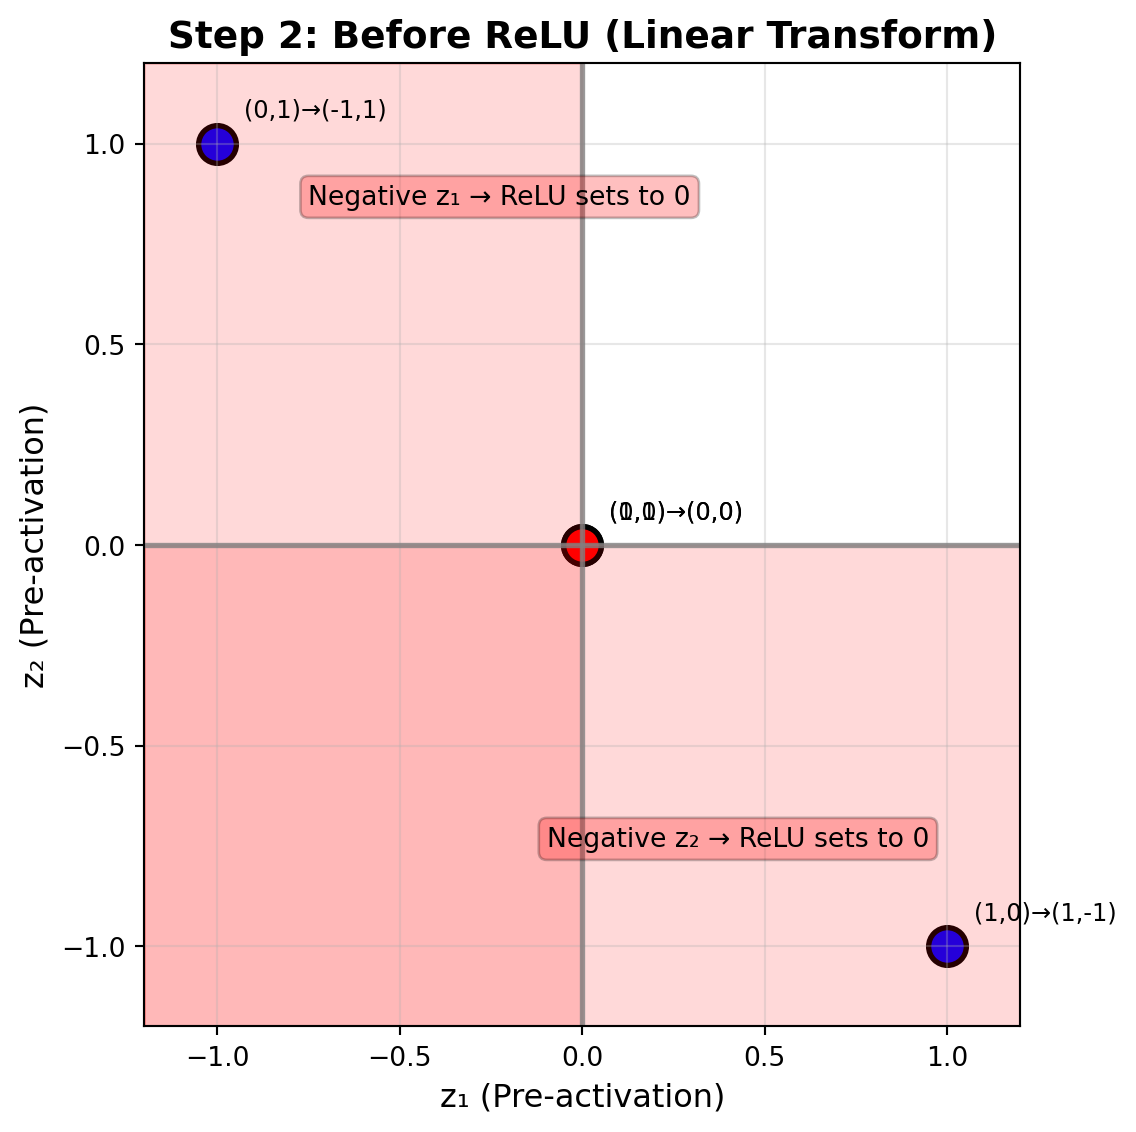

In [6]:
# Step 2 visualization: Pre-activation space
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

for i in range(4):
    ax.scatter(pre_activations[i, 0], pre_activations[i, 1], 
               c=colors[y[i]], s=200, edgecolors='black', linewidth=2)

# Draw ReLU boundaries
ax.axhline(0, color='gray', linestyle='-', alpha=0.8, linewidth=2)
ax.axvline(0, color='gray', linestyle='-', alpha=0.8, linewidth=2)

# Shade all regions where coordinates turn negative (and thus get clipped by ReLU)
ax.axvspan(-1.2, 0, alpha=0.15, color='red')
ax.axhspan(-1.2, 0, alpha=0.15, color='red')
ax.text(-0.75, 0.85, 'Negative z₁ → ReLU sets to 0', ha='left', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='red', alpha=0.25))
ax.text(0.95, -0.75, 'Negative z₂ → ReLU sets to 0', ha='right', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='red', alpha=0.25))

# Annotate points with input labels
labels = ['(0,0)', '(0,1)', '(1,0)', '(1,1)']
for i, label in enumerate(labels):
    pre_coord = f'({pre_activations[i,0]:.0f},{pre_activations[i,1]:.0f})'
    ax.annotate(f'{label}→{pre_coord}', pre_activations[i], xytext=(10, 10), 
                textcoords='offset points', fontsize=9)

ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel('z₁ (Pre-activation)', fontsize=12)
ax.set_ylabel('z₂ (Pre-activation)', fontsize=12)
ax.set_title('Step 2: Before ReLU (Linear Transform)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Step 3: ReLU Transformation

ReLU clips negative values to zero, transforming the space to make it linearly separable:

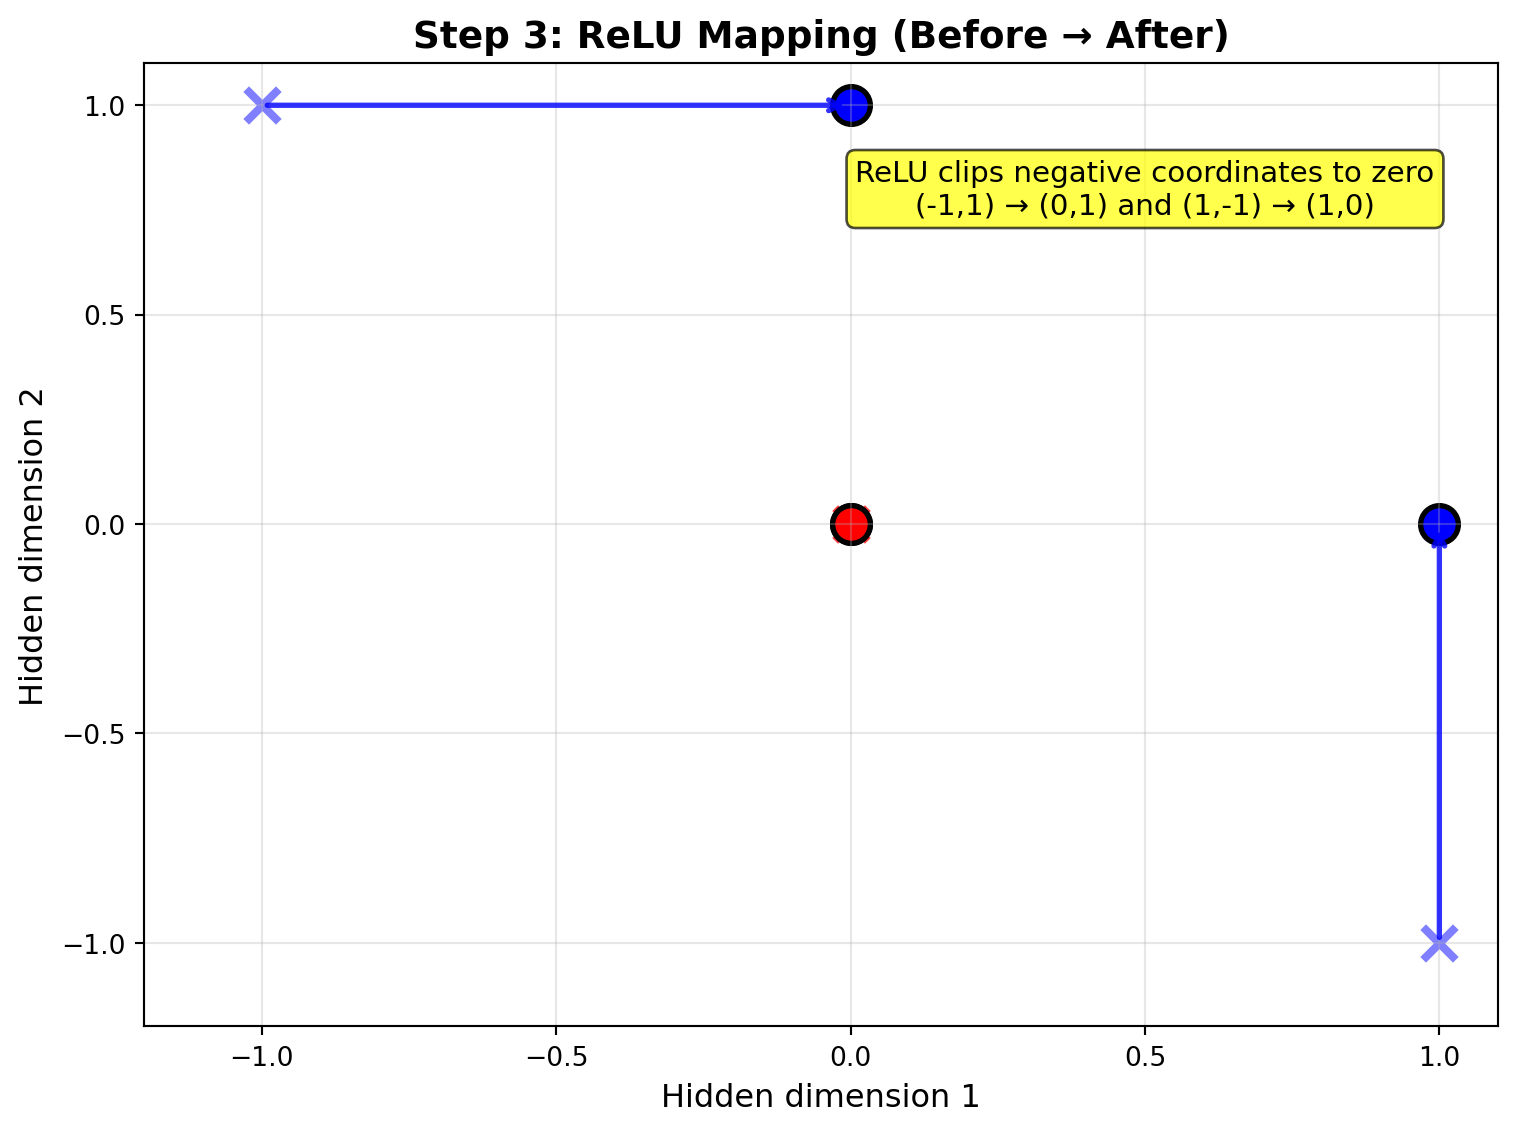

In [7]:
# Step 3 visualization: ReLU transformation with arrows
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for i in range(4):
    # Pre-ReLU positions (X marks)
    ax.scatter(pre_activations[i, 0], pre_activations[i, 1], 
               marker='x', s=150, c=colors[y[i]], alpha=0.5, linewidth=3)
    # Post-ReLU positions (circles) 
    ax.scatter(hidden_activations[i, 0], hidden_activations[i, 1], 
               marker='o', s=200, c=colors[y[i]], edgecolors='black', linewidth=2)
    
    # Draw transformation arrows
    start = pre_activations[i]
    end = hidden_activations[i]
    if not np.array_equal(start, end):
        ax.annotate('', xy=end, xytext=start,
                    arrowprops=dict(arrowstyle='->', lw=2, color=colors[y[i]], alpha=0.8))


# Add text box explaining the key transformation
ax.text(0.5, 0.8, 'ReLU clips negative coordinates to zero\n(-1,1) → (0,1) and (1,-1) → (1,0)', 
        ha='center', va='center', fontsize=11, 
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

ax.set_xlim(-1.2, 1.1)
ax.set_ylim(-1.2, 1.1)
ax.set_xlabel('Hidden dimension 1', fontsize=12)
ax.set_ylabel('Hidden dimension 2', fontsize=12)
ax.set_title('Step 3: ReLU Mapping (Before → After)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Step 4: Final Classification

With the transformed hidden representation, the network can now perfectly classify XOR:

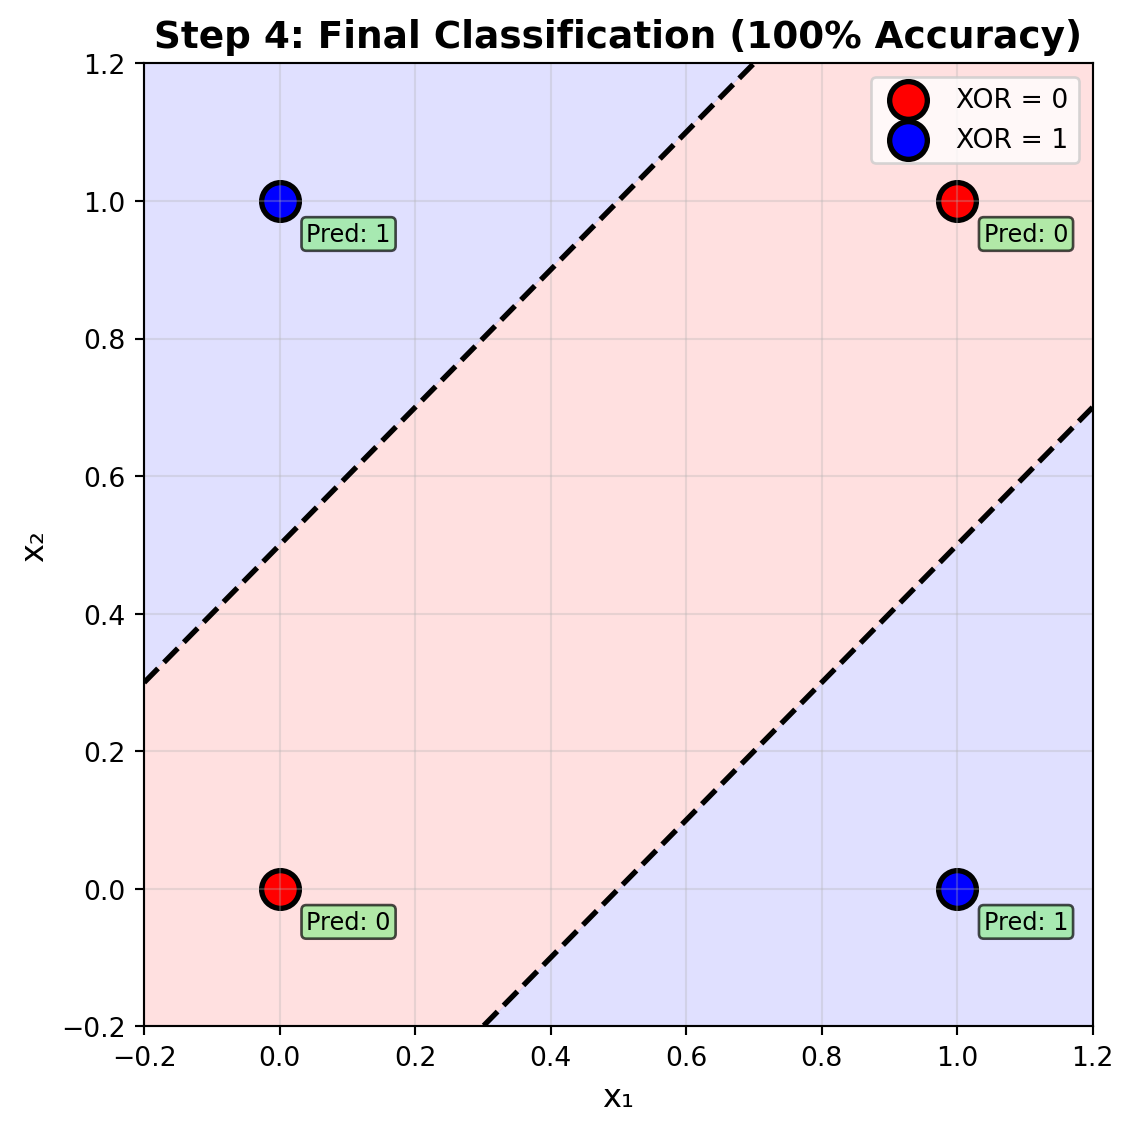

In [8]:


# Step 4 visualization: Final classification results
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Create decision boundary
xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 100), np.linspace(-0.2, 1.2, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_logits, _, _ = forward_pass(grid_points, W1, b1, w2, b2)
grid_preds = (grid_logits >= 0).astype(int).reshape(xx.shape)

ax.contourf(xx, yy, grid_preds, levels=[-0.5, 0.5, 1.5], 
            colors=['#ffcccc', '#ccccff'], alpha=0.6)
ax.contour(xx, yy, grid_logits.reshape(xx.shape), levels=[0], 
           colors='black', linewidths=2, linestyles='--')

for i in range(2):
    mask = y == i
    ax.scatter(X[mask, 0], X[mask, 1], c=colors[i], s=200, 
               label=f'XOR = {i}', edgecolors='black', linewidth=2)

ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.set_xlabel('x₁', fontsize=12)
ax.set_ylabel('x₂', fontsize=12)
ax.set_title('Step 4: Final Classification (100% Accuracy)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

sample_logits, _, _ = forward_pass(X, W1, b1, w2, b2)
sample_preds = (sample_logits >= 0).astype(int)
for i in range(4):
    pred_text = f'Pred: {sample_preds[i]}'
    ax.annotate(pred_text, X[i], xytext=(10, -15), 
                textcoords='offset points', fontsize=9,
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.show()


## Conclusion

The XOR problem demonstrates several fundamental principles in deep learning:

1. **Necessity of Nonlinearity**: Linear models cannot solve XOR, establishing the critical role of nonlinear activation functions.

2. **Universal Approximation**: Even simple architectures with sufficient nonlinearity can solve complex classification problems.